
# Shadows as Linear Transformations (2D projection of 3D points)

This notebook turns the 6‑part exercise into a step‑by‑step mini‑lesson.
You'll derive the projection formula, translate it to Einstein notation,
build the corresponding (non‑square) matrix, and work through two concrete
computations — first for a single point, then for a whole matrix of points.

**Prereqs:** basic vectors, dot products, unit vectors, matrix–vector multiplication.

---


## 🌞 The Intuition: Why Do We Care About Shadow Projections?

Imagine you're standing outside on a sunny day. Your 3D body casts a 2D shadow on the ground. This shadow is a **projection** of your 3D form onto the 2D ground plane.

**Key insights:**
- The sun's rays are essentially parallel (the sun is very far away)
- Each point on your body follows a straight ray from the sun until it hits the ground
- The collection of all these "hit points" forms your shadow

This is exactly what we're modeling mathematically! We're taking 3D points and finding where they land on a 2D plane when light comes from a specific direction.

**Why is this important in linear algebra?**
- It's a perfect example of **dimension reduction** (3D → 2D)
- It shows how **non-square matrices** naturally arise
- It demonstrates **parallel projection** vs. orthogonal projection
- It connects geometry to matrix operations

Let's dive into the math behind this everyday phenomenon!

## Learning goals

By the end, you can:

1. Derive the shadow point $\mathbf{r}'$ of a point $\mathbf{r}$ on the ground plane (normal $\mathbf{e}_3$) when light comes from a direction $\hat{\mathbf{s}}$.
2. Express the result in index (Einstein summation) form.
3. Build the $2\times 3$ matrix $A$ that maps 3D points to 2D ground coordinates.
4. Apply $A$ to a single vector and to a whole matrix of vectors.
5. Interpret why non‑square matrices naturally appear here.


## 📐 Scenario (Setting Up the Geometry)

Let's establish our coordinate system and the key elements:

### The Setup
* **Ground plane**: The plane where shadows fall, defined by $z = 0$
  - Normal vector: $\mathbf{e}_3 = (0, 0, 1)$ points straight up
  - Any point on the ground has coordinates $(x, y, 0)$

* **3D Point**: $\mathbf{r} = (x, y, z)$ represents any object in 3D space
  - Could be a person, tree, building, etc.
  - We want to find where its shadow falls

* **Sun direction**: $\hat{\mathbf{s}} = (s_1, s_2, s_3)$ is a **unit vector**
  - Points in the direction the sun's rays travel
  - Parallel rays (sun is infinitely far away)
  - Must have $s_3 \neq 0$ (sun can't be exactly horizontal)

### The Key Insight
A light ray through point $\mathbf{r}$ follows the path:
$$\mathbf{r}' = \mathbf{r} + \lambda\,\hat{\mathbf{s}} \tag{1}$$

where $\lambda$ is how far we travel along the ray.

The shadow point $\mathbf{r}'$ is where this ray hits the ground, so:
$$\mathbf{r}' \cdot \mathbf{e}_3 = 0 \quad \text{(height must be zero)}$$

**Think about it**: We start at $\mathbf{r}$, move distance $\lambda$ in direction $\hat{\mathbf{s}}$, and stop when we hit the ground!

🌞 3D Shadow Projection Visualization
Point A: (2, 1, 3) → Shadow (3.50, 1.75, 0)
Point B: (4, 3, 5) → Shadow (6.50, 4.25, 0)
Point C: (1, 4, 2) → Shadow (2.00, 4.50, 0)
Point D: (5, 2, 4) → Shadow (7.00, 3.00, 0)

🌅 Adding background parallel rays...


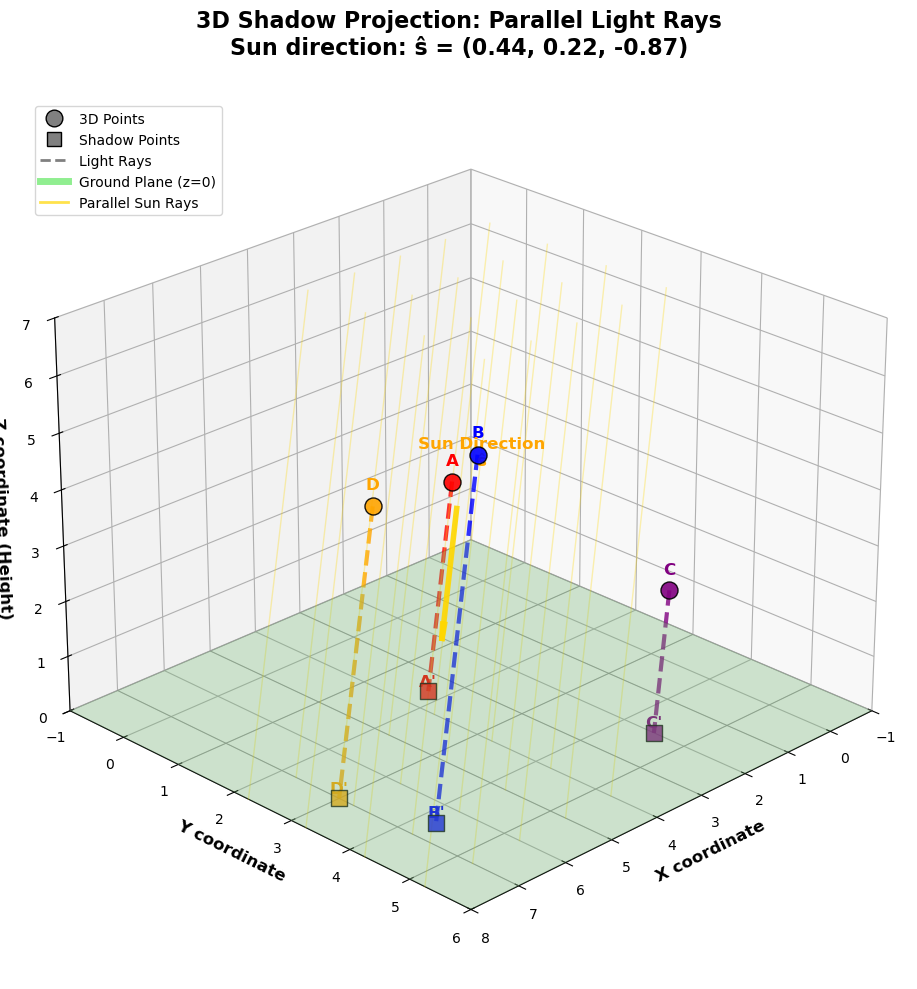


🔍 Key insights from this 3D visualization:
  • All light rays are perfectly parallel (same direction vector)
  • Each 3D point follows its own ray until hitting the ground plane
  • The shadow position depends on both the point's height and location
  • This is a LINEAR transformation - the geometric relationships are preserved
  • You can see how this maps 3D points → 2D shadows (dimension reduction)


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a 3D visualization to illustrate the shadow projection concept
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Define our 3D points and sun direction
points_3d = np.array([
    [2, 1, 3],    # Point 1
    [4, 3, 5],    # Point 2  
    [1, 4, 2],    # Point 3
    [5, 2, 4]     # Point 4
])

# Sun direction (pointing down and to the right)
sun_direction = np.array([1, 0.5, -2])  # (x, y, z) components
sun_direction = sun_direction / np.linalg.norm(sun_direction)  # normalize

def project_point_to_ground(point, sun_dir):
    """Project a 3D point along sun direction to z=0 plane"""
    # Find parameter t where: point + t * sun_dir has z = 0
    t = -point[2] / sun_dir[2]
    return point + t * sun_dir

# Draw ground plane (z=0) with grid
ground_x = np.linspace(-1, 8, 10)
ground_y = np.linspace(-1, 6, 8)
xx, yy = np.meshgrid(ground_x, ground_y)
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.3, color='lightgreen')

# Add grid lines on the ground for better depth perception
for x in ground_x[::2]:
    ax.plot([x, x], [ground_y[0], ground_y[-1]], [0, 0], 'gray', alpha=0.5, linewidth=0.5)
for y in ground_y[::2]:
    ax.plot([ground_x[0], ground_x[-1]], [y, y], [0, 0], 'gray', alpha=0.5, linewidth=0.5)

# Colors for different points
colors = ['red', 'blue', 'purple', 'orange']
point_labels = ['A', 'B', 'C', 'D']

print("🌞 3D Shadow Projection Visualization")
print("=" * 40)

# Plot each point and its shadow
for i, (point, color, label) in enumerate(zip(points_3d, colors, point_labels)):
    # Calculate shadow point
    shadow = project_point_to_ground(point, sun_direction)
    
    # Plot the original 3D point
    ax.scatter(*point, s=150, c=color, marker='o', 
               label=f'Point {label} (3D)', alpha=0.9, edgecolors='black', linewidth=1)
    
    # Plot the shadow point on ground
    ax.scatter(*shadow, s=120, c=color, marker='s',
               label=f'Shadow {label}', alpha=0.8, edgecolors='black', linewidth=1)
    
    # Draw the sun ray (light path)
    ax.plot([point[0], shadow[0]], [point[1], shadow[1]], [point[2], shadow[2]], 
            color=color, linewidth=3, linestyle='--', alpha=0.8)
    
    # Add text labels
    ax.text(point[0], point[1], point[2] + 0.3, f'{label}', fontsize=12, 
            color=color, weight='bold', ha='center')
    ax.text(shadow[0], shadow[1], shadow[2] + 0.1, f"{label}'", fontsize=12, 
            color=color, weight='bold', ha='center')
    
    print(f"Point {label}: ({point[0]}, {point[1]}, {point[2]}) → Shadow ({shadow[0]:.2f}, {shadow[1]:.2f}, 0)")

# Add multiple parallel sun rays in the background to show parallelism
print("\n🌅 Adding background parallel rays...")
n_rays = 8
for i in range(n_rays):
    for j in range(5):
        # Create rays starting from above the scene
        start_height = 7
        start_x = i + 0.5
        start_y = j + 0.5
        start_point = np.array([start_x, start_y, start_height])
        
        # Project to ground
        end_point = project_point_to_ground(start_point, sun_direction)
        
        # Only draw if the end point is within our viewing area
        if -1 <= end_point[0] <= 8 and -1 <= end_point[1] <= 6:
            ax.plot([start_point[0], end_point[0]], 
                   [start_point[1], end_point[1]], 
                   [start_point[2], end_point[2]], 
                   'gold', alpha=0.3, linewidth=1)

# Add a prominent sun direction arrow
sun_arrow_start = np.array([7, 5, 6])
sun_arrow_end = sun_arrow_start + 2 * sun_direction
ax.quiver(sun_arrow_start[0], sun_arrow_start[1], sun_arrow_start[2],
          sun_direction[0], sun_direction[1], sun_direction[2],
          length=2, color='gold', arrow_length_ratio=0.15, linewidth=4, alpha=0.9)

# Add sun direction text
ax.text(sun_arrow_start[0] - 0.5, sun_arrow_start[1], sun_arrow_start[2] + 0.5, 
        'Sun Direction\nŝ', fontsize=12, color='orange', weight='bold', ha='center')

# Customize the plot
ax.set_xlabel('X coordinate', fontsize=12, weight='bold')
ax.set_ylabel('Y coordinate', fontsize=12, weight='bold')
ax.set_zlabel('Z coordinate (Height)', fontsize=12, weight='bold')

ax.set_title('3D Shadow Projection: Parallel Light Rays\n' + 
             f'Sun direction: ŝ = ({sun_direction[0]:.2f}, {sun_direction[1]:.2f}, {sun_direction[2]:.2f})', 
             fontsize=16, weight='bold', pad=20)

# Set viewing limits for better perspective
ax.set_xlim(-1, 8)
ax.set_ylim(-1, 6)
ax.set_zlim(0, 7)

# Improve the viewing angle
ax.view_init(elev=25, azim=45)

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', 
           markersize=12, label='3D Points', markeredgecolor='black'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='gray', 
           markersize=10, label='Shadow Points', markeredgecolor='black'),
    Line2D([0], [0], color='gray', linestyle='--', linewidth=2, label='Light Rays'),
    Line2D([0], [0], color='lightgreen', linewidth=5, label='Ground Plane (z=0)'),
    Line2D([0], [0], color='gold', alpha=0.7, linewidth=2, label='Parallel Sun Rays')
]
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.02, 0.98))

# Add a subtle grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Key insights from this 3D visualization:")
print("  • All light rays are perfectly parallel (same direction vector)")
print("  • Each 3D point follows its own ray until hitting the ground plane")
print("  • The shadow position depends on both the point's height and location")
print("  • This is a LINEAR transformation - the geometric relationships are preserved")
print("  • You can see how this maps 3D points → 2D shadows (dimension reduction)")

## 🧮 Step 1: Derive the Shadow Formula

Let's solve for the shadow point step by step.

### The Problem
We have a ray: $\mathbf{r}' = \mathbf{r} + \lambda\,\hat{\mathbf{s}}$ that must hit the ground.

**Ground constraint**: $\mathbf{r}' \cdot \mathbf{e}_3 = 0$ (height = 0)

### Step 1: Apply the constraint
$$(\mathbf{r} + \lambda \hat{\mathbf{s}}) \cdot \mathbf{e}_3 = 0$$

### Step 2: Use linearity of dot product
$$\mathbf{r} \cdot \mathbf{e}_3 + \lambda (\hat{\mathbf{s}} \cdot \mathbf{e}_3) = 0$$

### Step 3: Recognize what these dot products mean
- $\mathbf{r} \cdot \mathbf{e}_3 = r_3$ (the height of our original point)
- $\hat{\mathbf{s}} \cdot \mathbf{e}_3 = s_3$ (vertical component of sun direction)

So: $r_3 + \lambda s_3 = 0$

### Step 4: Solve for λ
$$\lambda = -\frac{r_3}{s_3}$$

**Physical interpretation**: 
- If $r_3 > 0$ (point above ground) and $s_3 < 0$ (sun rays pointing down), then $\lambda > 0$
- We travel a positive distance along the ray to reach the ground

### Step 5: Substitute back
$$\mathbf{r}' = \mathbf{r} + \lambda\,\hat{\mathbf{s}} = \mathbf{r} - \hat{\mathbf{s}}\,\frac{r_3}{s_3}$$

Therefore:
$$\boxed{\;\mathbf{r}' = \mathbf{r} - \hat{\mathbf{s}}\,\frac{\mathbf{r} \cdot \mathbf{e}_3}{s_3}\;} \tag{2}$$

This is the **parallel projection** formula - we're projecting along direction $\hat{\mathbf{s}}$, not perpendicular to the plane!

In [2]:
# Let's test our formula with a simple example
import numpy as np

# Simple example: sun pointing straight down
r = np.array([3, 4, 5])  # Point at height 5
s_hat = np.array([0, 0, -1])  # Sun rays pointing straight down

# Apply our formula: r' = r - s_hat * (r·e3)/s3
e3 = np.array([0, 0, 1])
r_dot_e3 = np.dot(r, e3)  # This is just r[2] = 5
s3 = s_hat[2]  # This is -1

r_prime = r - s_hat * (r_dot_e3 / s3)

print("🌞 Simple Example: Sun directly overhead")
print(f"Original point: r = {r}")
print(f"Sun direction: ŝ = {s_hat}")
print(f"Shadow point: r' = {r_prime}")
print(f"Notice: x and y stay the same, z becomes 0 ✓")

print("\n" + "="*50)

# More interesting example: sun at an angle
r = np.array([2, 3, 4])  # Point at height 4
s_hat = np.array([1, 0, -2]) / np.sqrt(5)  # Sun rays at an angle

r_prime = r - s_hat * (np.dot(r, e3) / s_hat[2])

print("🌅 More Complex Example: Sun at an angle")
print(f"Original point: r = {r}")
print(f"Sun direction: ŝ = {s_hat}")
print(f"Shadow point: r' = {r_prime}")
print(f"Notice: x and y coordinates changed! The shadow is displaced.")
print(f"Height check: z' = {r_prime[2]:.10f} ≈ 0 ✓")

🌞 Simple Example: Sun directly overhead
Original point: r = [3 4 5]
Sun direction: ŝ = [ 0  0 -1]
Shadow point: r' = [3. 4. 0.]
Notice: x and y stay the same, z becomes 0 ✓

🌅 More Complex Example: Sun at an angle
Original point: r = [2 3 4]
Sun direction: ŝ = [ 0.4472136   0.         -0.89442719]
Shadow point: r' = [4. 3. 0.]
Notice: x and y coordinates changed! The shadow is displaced.
Height check: z' = 0.0000000000 ≈ 0 ✓


## 📝 Step 2: Express in Index Notation (Einstein Summation)

Now let's translate our formula into **index notation** - this will help us build the matrix later.

### Why Index Notation?
Index notation is useful because:
- It makes the component-wise operations explicit
- It's easier to translate to matrix form
- It's the language used in tensor calculus and advanced physics

### The Translation

Our vector formula was: $\mathbf{r}' = \mathbf{r} - \hat{\mathbf{s}}\,\frac{\mathbf{r} \cdot \mathbf{e}_3}{s_3}$

Let's break this down component by component. Using indices:
- $r_i$ = $i$-th component of $\mathbf{r}$
- $s_i$ = $i$-th component of $\hat{\mathbf{s}}$
- $\mathbf{r} \cdot \mathbf{e}_3 = r_j [\mathbf{e}_3]_j = r_3$ (since $\mathbf{e}_3 = (0,0,1)$)

### Component by Component

For each component $i = 1, 2, 3$:
$$r'_i = r_i - s_i \frac{r_3}{s_3}$$

**Let's verify this makes sense:**
- When $i = 1$: $r'_1 = r_1 - s_1 \frac{r_3}{s_3}$ ✓
- When $i = 2$:
- When $i = 3$: $r'_3 = r_3 - s_3 \frac{r_3}{s_3} = r_3 - r_3 = 0$ ✓

### More General Forms

You might also see this written as:
- $r'_i = (\delta_{ij} - s_i\,\delta_{3j}/s_3)\,r_j$ 

where $\delta_{ij}$ is the **Kronecker delta**:
$$\delta_{ij} = \begin{cases} 1 & \text{if } i = j \\ 0 & \text{if } i \neq j \end{cases}$$

**Why this works**: $\delta_{ij} r_j = r_i$ and $\delta_{3j} r_j = r_3$